### 타이타닉 데이터 가져오기

In [2]:
titanic = pd.read_csv('train.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### ["Survived","Age"] 컬럼을 가지는 titanic_df 데이터 프레임을 만들고 Age가 NaN인 row 데이터를 삭제

In [128]:
titanic_df = pd.DataFrame(titanic, columns = ["Survived", "Age"]).dropna(how = "any")
titanic_df = titanic_df.dropna(how = 'any').reset_index(drop = True)
titanic_df.tail()

,Survived,Age
709,0,39.0
710,0,27.0
711,1,19.0
712,1,26.0
713,0,32.0


#### Ages 컬럼을 만들고 Ages 컬럼에는 연령대에 대한 데이터 삽입

In [129]:
def ages(age):
    return age // 10 * 10

In [131]:
titanic_df["Ages"] = titanic_df["Age"].apply(ages).astype('int')
titanic_df['Age'] = titanic_df['Age'].astype('int')
titanic_df.tail()

,Survived,Age,Ages
709,0,39,30
710,0,27,20
711,1,19,10
712,1,26,20
713,0,32,30


#### 연령대별로 생존률

In [132]:
titanic_df["Count"] = 1
titanic_df = titanic_df.pivot_table(values = 'Count', index = 'Ages', columns = 'Survived', aggfunc = np.sum)
titanic_df

Survived,0,1
Ages,,
0,24.0,38.0
10,61.0,41.0
20,143.0,77.0
30,94.0,73.0
40,55.0,34.0
50,28.0,20.0
60,13.0,6.0
70,6.0,NaN
80,NaN,1.0


In [138]:
titanic_df["survived_rate"] = round((titanic_df[1] / (titanic_df[0] + titanic_df[1])) * 100,2) 
titanic_df = titanic_df.dropna(how = 'any')
titanic_df

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


#### 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기

In [162]:
titanic_df3 = titanic_df.rename({0:"non_survived", 1:"survived"}, axis = 1)
titanic_df3

Survived,non_survived,survived,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


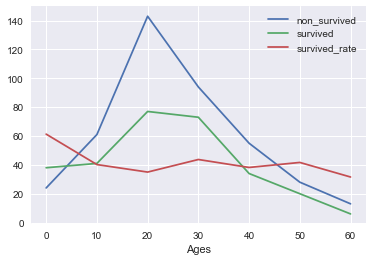

In [163]:
titanic_df3.plot()
plt.legend(loc = 'best')
plt.show()